<a href="https://colab.research.google.com/github/DAANOUNE1/DAA/blob/main/Kmeancluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Clustering
Using K-Means Machine Learning Algorithms
This **texte en gras**





**This project demonstrates how machine learning algorithms can be used to clustering for Iris**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
df=pd.read_csv('/content/IRIS.csv')

In [7]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


les categorie existantes: Iris-setosa, Iris-versicolor,Iris-virginica

In [10]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
pd.crosstab(index=df["species"], columns="count")

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


preparation de data:

In [12]:
features = ['sepal_length','sepal_width','petal_length','petal_width']

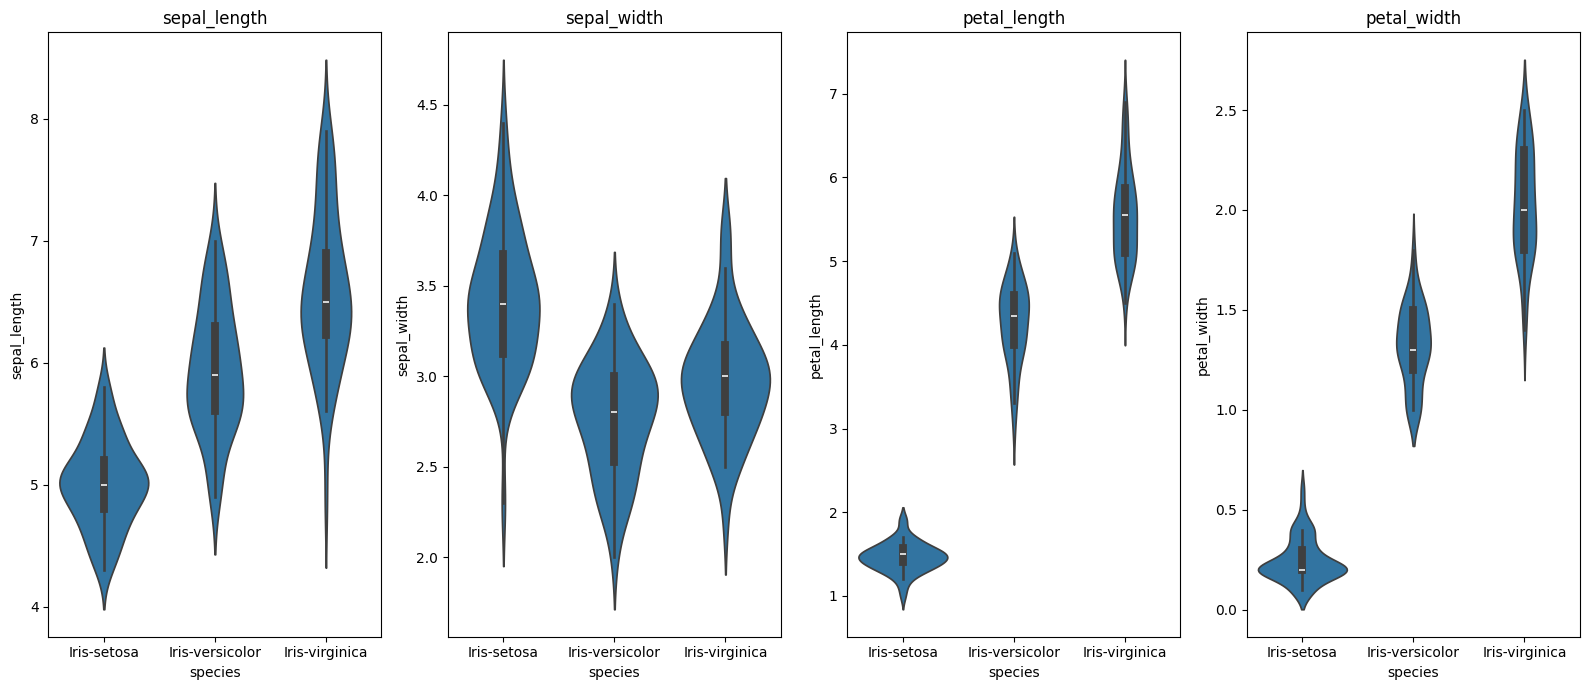

In [25]:
fig,axes=plt.subplots(1,len(features),figsize=(16,7))
for i,f in enumerate(features):
 sns.violinplot(x='species',y=f,data=df,ax=axes[i])
 axes[i].set_title(f)
plt.tight_layout()
plt.show()


**Pairplot for Feature Visualization**

Diagramme de paires pour la visualisation des caractéristiques
Dans ce code, nous créons un diagramme de paires à l'aide de Seaborn pour visualiser les relations entre toutes les paires de caractéristiques du jeu de données. Le paramètre de teinte est défini sur « espèce », ce qui signifie que les différentes espèces seront représentées par des couleurs différentes dans les diagrammes. Chaque sous-diagramme affiche un diagramme de dispersion pour chaque paire de caractéristiques, ainsi que les diagrammes diagonaux correspondants, qui représentent la distribution des caractéristiques individuelles. Cette visualisation permet de comprendre les corrélations entre les caractéristiques et leurs variations selon les espèces.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


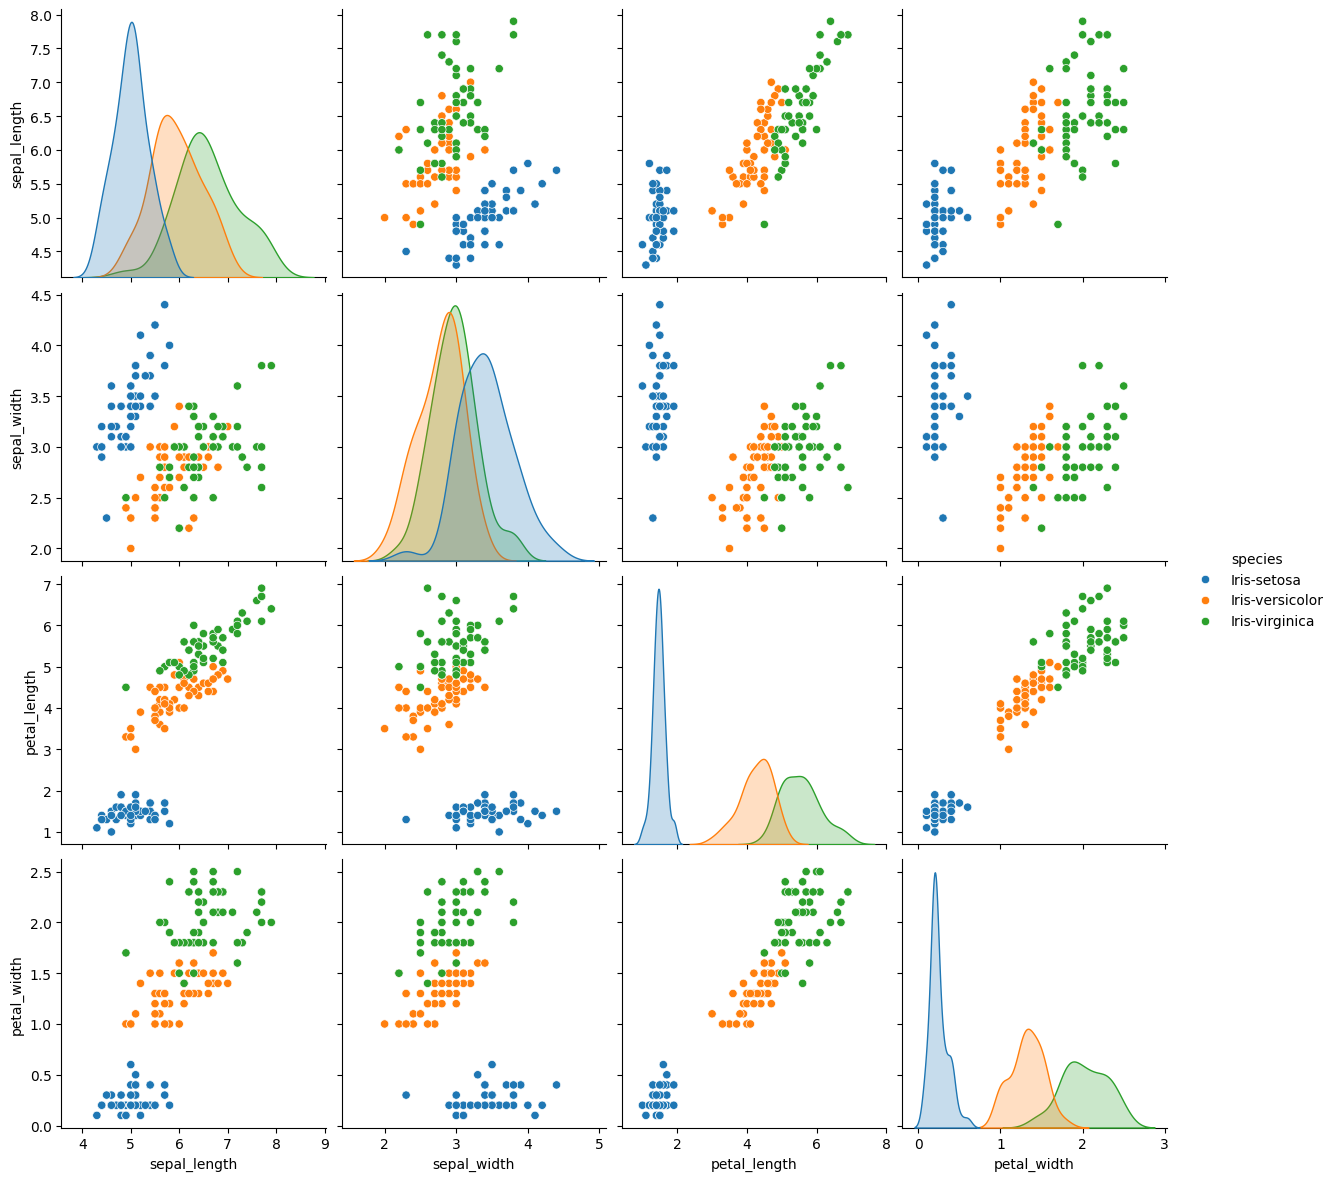

In [26]:
sns.pairplot(data=df , hue= 'species' , size=3)

**Distribution Plot for Features**

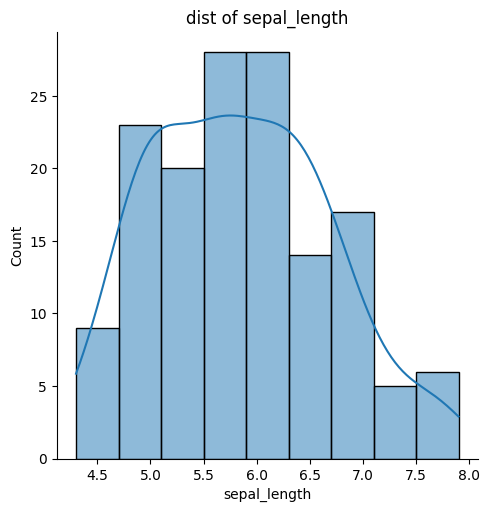

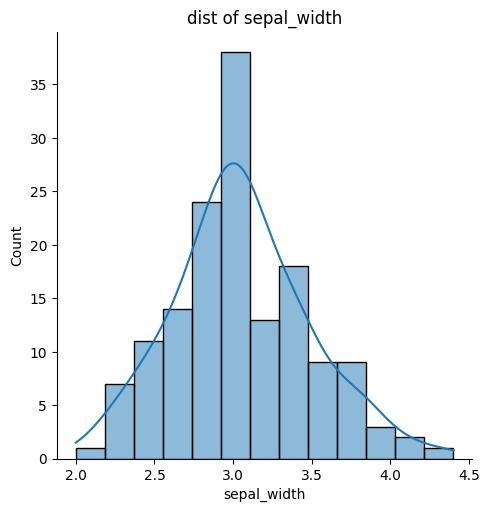

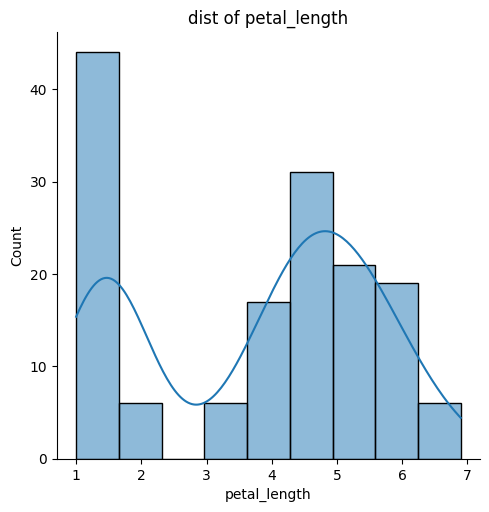

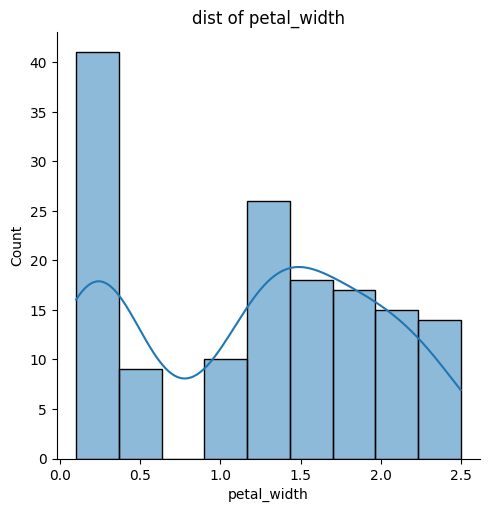

In [30]:
for f in (features) :
  sns.displot(data= df ,x = f , kde = True)
  plt.title(f'dist of {f}')
  plt.show()

**Boxplot and Outlier Handling** boite à mustache et les valeurs aberrantes.

<Axes: >

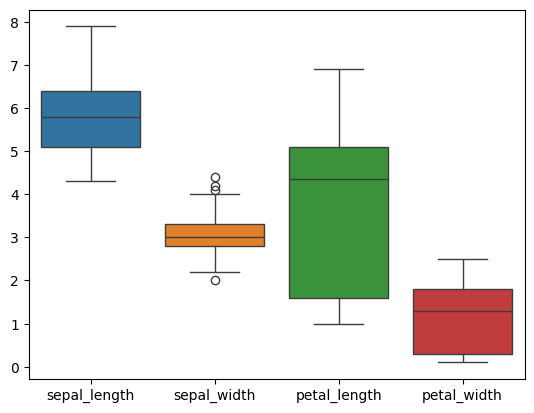

In [31]:
sns.boxplot(data=df)

on constate l existence des valeurs aberantes dans "sepal_length" on va les remplacer par la valeur mediane

We then calculate the Interquartile Range (IQR) for the 'sepal_width' feature,
which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Using
the IQR, we define the minimum and maximum ranges for acceptable values.

Interprétation d’un boxplot :
Ligne centrale : médiane (Q2)

Bords de la boîte : Q1 (25%) et Q3 (75%)

Tiges (moustaches) : généralement jusqu’à 1,5 * IQR (intervalle interquartile)

Points isolés : outliers (valeurs aberrantes)

**df.loc[0, 'species'] = 'modified'**

Ce masque retourne True pour chaque ligne où sepal_width est inférieure à min_range ou supérieure à max_range (typiquement définis comme Q1 - 1.5*IQR et Q3 + 1.5*IQR).

| signifie "OU" logique entre les deux conditions.

Cette ligne remplace les valeurs aberrantes de la colonne 'sepal_width' par la médiane de la colonne (valeur centrale, plus robuste à la présence d’outliers).

np.median() calcule la médiane, et int() convertit la valeur en entier.

In [37]:
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)
IQR = q3 - q1
min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR
outliers_mask = (df['sepal_width'] < min_range) | (df['sepal_width'] > max_range)
df.loc[outliers_mask, 'sepal_width'] = int(np.median(df['sepal_width']))

<Axes: >

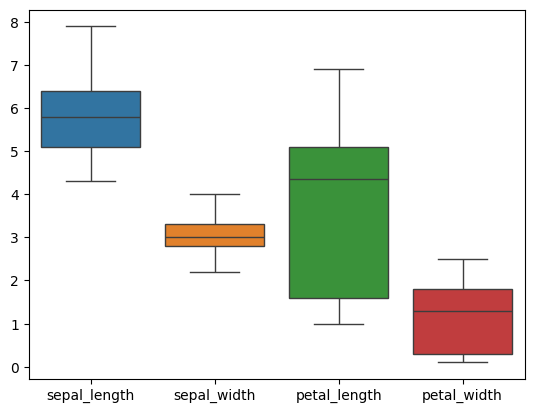

In [38]:
sns.boxplot(data=df)

In [39]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.036000,3.758667,1.198667
std,0.828066,0.389851,1.764420,0.763161
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


# K-Means Clustering:

In [48]:
from sklearn.cluster import KMeans
inertia=[]
k_range=range(1,10)
x=df.drop('species',axis=1)
for k in k_range:
  model=KMeans(n_clusters=k,max_iter=500)
  model.fit(x)
  inertia.append(model.inertia_)

# Elbow Method
The Elbow Method is a technique used to determine the optimal number of clusters (K) in
K-Means clustering. It works by plotting the Within-Cluster Sum of Squares (WCSS)
against the number of clusters. As the number of clusters increases, WCSS decreases, but the rate of decrease slows down. The "elbow" point, where the decrease becomes less
significant, indicates the optimal number of clusters.

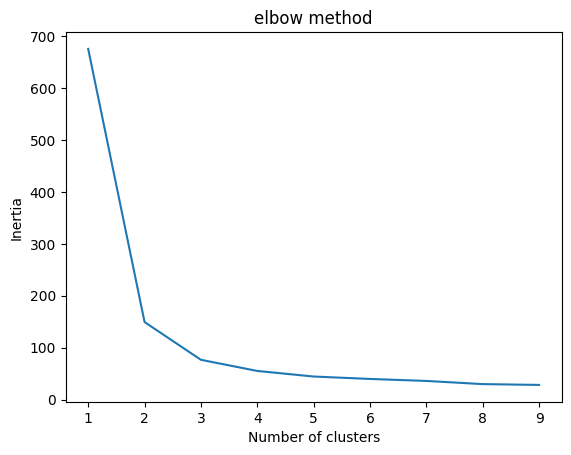

In [52]:
plt.plot(range(1,10), inertia)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

donc k=*3*
3 classes

In [55]:
model = KMeans(n_clusters = 3 , max_iter = 500, n_init = 10, random_state = 42)
y = model.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [56]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.344     , 1.464     , 0.244     ],
       [5.88360656, 2.75737705, 4.38852459, 1.43442623]])

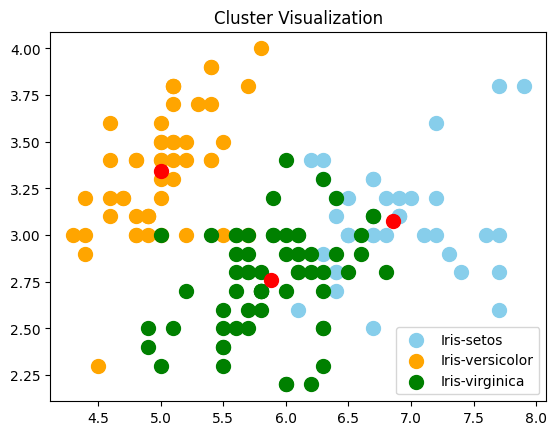

In [59]:
x = np.array(x)
y = np.array(y)
plt.scatter(x[y == 0, 0], x[y == 0, 1], s=100, c='skyblue', label='Iris-setos')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s=100, c='orange', label='Iris-versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s=100, c='green', label='Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='r')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

** Le silhouette score (ou coefficient de silhouette**) est une mesure d’évaluation pour les algorithmes de clustering (comme K-means). Il indique à quel point chaque point est bien regroupé dans son cluster et séparé des autres clusters.

Pour chaque point
Silhouette(i)= b(i)−a(i) devié par max(a(i),b(i))

+1 → Clustering parfait (bien séparé et bien groupé)

🟡 0 → Chevauchement possible entre clusters

🔴 -1 → Mauvais clustering (le point est peut-être mal assigné)




In [61]:
print(silhouette_score(x , y))

0.5531602359821158


Score Silhouette	Interprétation
0.71 – 1.00	Clustering fort (très bien séparé)
0.51 – 0.70	Bon clustering (→ ici 0.55)
0.26 – 0.50	Moyennement structuré
0.00 – 0.25	Peu structuré / clusters peu distincts
< 0	Mauvais clustering (points mal assignés)

Donc, un score de 0.55 :
Montre que les points sont globalement bien regroupés dans leurs clusters.

Indique que les clusters sont bien distincts, mais il peut exister un peu de chevauchement ou de bruit.

In [97]:
fleur = np.array([[5.1, 3.5, 4.5,1]])

In [94]:
cluster = model.predict(fleur)
print(cluster)

print(f"La fleur est classée dans le cluster : {cluster[0]}")

[0]
La fleur est classée dans le cluster : 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [95]:
df['predicted_cluster'] = model.labels_

# Mapper le cluster dominant à l'espèce réelle
mapping = df.groupby('predicted_cluster')['species'].agg(lambda x: x.mode()[0]).to_dict()
print("Association cluster → espèce :", mapping)

Association cluster → espèce : {0: 'Iris-virginica', 1: 'Iris-setosa', 2: 'Iris-versicolor'}


In [96]:
espece_predite = mapping[cluster[0]]
print(f"Espèce prédite : {espece_predite}")

Espèce prédite : Iris-virginica


le mapping permet d’associer les clusters numériques produits par KMeans (0, 1, 2) aux noms des espèces (setosa, versicolor, virginica), car KMeans ne connaît pas les vraies étiquettes.